<a href="https://colab.research.google.com/github/nicholasfurl/Great-Courses/blob/main/Lesson09_SVM_malware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#we will use the same malware problem as in Lesson 8 (nearest neigbor) but will run SVM instead.

In [1]:
#No tf/keras needed yet
#yay! plots! I need to learn these ...

from sklearn import neighbors
import matplotlib.pyplot as plt

In [2]:
#Data come from Great Courses
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/data/malware-test.csv
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/data/malware-train.csv

--2023-01-06 12:06:03--  https://github.com/mlittmancs/great_courses_ml/raw/master/data/malware-test.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/malware-test.csv [following]
--2023-01-06 12:06:03--  https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/malware-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11593257 (11M) [text/plain]
Saving to: ‘malware-test.csv’

malware-test.csv    100%[===================>]  11.06M  --.-KB/s    in 0.1s    

2023-01-06 12:06:03 (88.4 MB/s) - ‘malware-test.csv’ saved [11593257/1159325

In [3]:
#declare a getdat function, which collects the data and labels within the file used for training. 
#We loop over the lines of the given file one by one, splitting each line into components at the commas. 
#The data file uses pe-malicious to label the positive instances of malware. 
#So, we use == "pre-malicious" to turn those labels into 0/False for safe and 1/True for malware. 
#The function returns the data and the labels for the file. Since the data is read from the file as a string, 
#each component needs to be converted to a floating point number.
#We then use this funciton to get the training and test data used for our model.

#This cell is only a function definition

def getdat(filename):

    #So with closes resources after using them and is often used when opening a file.
    #I guess it eliminates the f after data is created?
    #no f is a TextIOWrapper and seems to still exist after
    #It is supposed to be like a try/catch block and relate to exception handling somehow too
    with open(filename, "r") as f:
       data = f.readlines()

    #anyway, now we have data, which is a list with 4000 items, each of which is a string of comma separated data

    #Initial lists we will use for output (brackets define a list)
    dat = []
    labs = []

    #Loops through each line and takes the string and splits it into data 
    for line in data:

        #Splits each line into a new list along the commas. Wordline should have 487 items
        wordline = line.split(",")

        #append to label list (+ can append to a list apparently) "True" (not a one) if the first item in this line is "pe-malicious"
        #does it authomatically pad a False otherwise, even for elements past the last true?
        labs = labs + [wordline[0] == "pe-malicious"]

        #mini-loop through all the data items in wordline, converting each to float and then appending as new items to data list
        dat = dat + [[float(wordline[i]) for i in range(1,len(wordline))]]

    #Return lists of labels and datalines (float)
    return(dat,labs)


In [4]:
traindat, trainlabs = getdat("malware-train.csv")
testdat, testlabs = getdat("malware-test.csv")

#traindat should be a 4000 item list
print(traindat[0])
#trainlabs should be a 4000 item list
print(trainlabs[0])
#testdat should be a 2000 item list
print(testdat[0])
#testlabs should be a 2000 item list
print(testlabs[0])

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.266666666667, 0.141176470588, 0.0627450980392, 0.313725490196, 0.341176470588, 1.0, 0.0823529411765, 0.439215686275, 0.443137254902, 0.250980392157, 0.0, 0.41568627451, 0.0823529411765, 0.333333333333, 0.333333333333, 1.0, 0.454901960784, 0.141176470588, 0.125490196078, 1.0, 0.454901960784, 0.141176470588, 0.125490196078, 0.333333333333, 1.0, 0.207843137255, 0.345098039216, 0.211764705882, 0.258823529412, 0.0, 1.0, 0.0823529411765, 0.533333333333, 0.443137254902, 0.250980392157, 0.0, 0.333333333333, 1.0, 0.462745098039, 0.0470588235294, 0.909803921569, 0.56862745098, 0.839215686275, 1.0, 1.0, 0.223529411765, 0.176470588235, 0.298039215686, 0.211764705882, 0.258823529412, 0.0, 0.458823529412, 0.360784313725, 0.41568627451, 0.0313725490196, 1.0, 0.207843137255, 0.345098039216, 0.211764705882, 0.258823529412, 0.0, 1.0, 0.0823529411765, 0.376470588235, 0.0149752461244, 0.00418444903211, 0.00396123727204, 0.00395763708237, 0.00402809

In [5]:
#define a testscore function, which calculates the number of correctly classified examples in the test set.

#Just the function definition
def testscore(dat,labs):

    #So presumably labs is the same labs as the output of getdat
    #But dat will be a model object clf?

    #genberate labvel preditions
    yhats = clf.predict(dat)

    #Match predictions and labels in usual way
    correct = sum([yhats[i] == labs[i] for i in range(len(dat))])

    #Retrun proportion correct
    return(correct)

In [17]:
#subplots?

def plot_SVC(degrees,trainerr,testerr,traincorrect,testcorrect):

  import matplotlib.pyplot as plt

  fig = plt.figure()

#ax1 = fig.add_subplot(211)
#ax2 = fig.add_subplot(212)

#Title doesn't seem to work with subplot axes and adding it to the overall figure creates big axes for the whole figure that underlay the subplots and presumably would need to be rendered invisible or white
#plt.title('Overfitting in a SVM with higher polynomial degree') #note title pertains to a figure not an axis


  #works too, more transparent and like matlab
  ax1 = fig.add_subplot(2,2,1)
  ax2 = fig.add_subplot(2,2,2)

  ax1.scatter(degrees, trainerr)
  ax1.plot(degrees, trainerr, label='training error')
  ax1.scatter(degrees, testerr)
  ax1.plot(degrees, testerr, label='test error')
  ax1.legend()

  ax2.scatter(degrees, traincorrect)
  ax2.plot(degrees, traincorrect, label='training items')
  ax2.scatter(degrees, testcorrect)
  ax2.plot(degrees, testcorrect, label='test items')
  ax2.legend()
  #ax2.title('Proportion correct by polynomial kernel degree')
  #plt.show()

#Me learning and playing around:

#range only works for ints - so annoying!
#yrange = range(0,1,.2)
yrange = [x / 10.0 for x in range(0, 7, 1)]
print(yrange)

ax1.set_xticks(degrees)
ax1.tick_params(axis ='x', rotation = 45)
ax1.set_yticks(yrange) 

ax2.set_xticks(degrees)
ax2.set_yticks([x / 10.0 for x in range(0, 11, 2)]) 



[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]


In [14]:
#Run SVM on training data and get accuracy on test data

#POLY KERNEL

#Initialise a list to hold accuracy values for each level of k (the number of nearest neighbors considered)
acc = []

#Appears to be number of observations in training to use. 4000 happens to be all of them
m = 4000

from sklearn import svm

#initialise lists to hold errors
trainerr = []
testerr = []
traincorrect = []
testcorrect = []

#polynomial degrees to loop through
degrees = [0,1,2,3,4,5,6,7]

for degree in degrees:

  clf = svm.SVC(gamma='scale',kernel='poly', degree=degree)
  clf.fit(traindat, trainlabs)  

  #training data accuracy
  pred = clf.predict(traindat)
  trainerr += [sum([pred[i] != trainlabs[i] for i in range(len(trainlabs))]) / len(trainlabs)]
  traincorrect += [sum([pred[i] == trainlabs[i] for i in range(len(trainlabs))]) / len(trainlabs)]

  #test data accuracy
  pred = clf.predict(testdat)
  testerr += [sum([pred[i] != testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]
  testcorrect += [sum([pred[i] == testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]

  plot_SVC(degrees,trainerr,testerr,traincorrect,testcorrect)

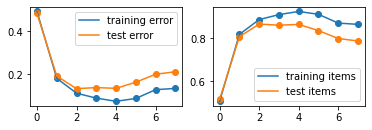

In [18]:
plot_SVC(degrees,trainerr,testerr,traincorrect,testcorrect)

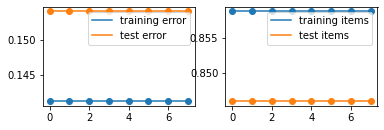

In [22]:
#Run SVM on training data and get accuracy on test data

#LINEAR KERNEL

#Initialise a list to hold accuracy values for each level of k (the number of nearest neighbors considered)
acc = []

#Appears to be number of observations in training to use. 4000 happens to be all of them
m = 4000

from sklearn import svm

#initialise lists to hold errors
trainerr = []
testerr = []
traincorrect = []
testcorrect = []

#polynomial degrees to loop through
degrees = [0,1,2,3,4,5,6,7]

for degree in degrees:

  clf = svm.SVC(gamma='scale',kernel='linear', degree=degree)
  clf.fit(traindat, trainlabs)  

  #training data accuracy
  pred = clf.predict(traindat)
  trainerr += [sum([pred[i] != trainlabs[i] for i in range(len(trainlabs))]) / len(trainlabs)]
  traincorrect += [sum([pred[i] == trainlabs[i] for i in range(len(trainlabs))]) / len(trainlabs)]

  #test data accuracy
  pred = clf.predict(testdat)
  testerr += [sum([pred[i] != testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]
  testcorrect += [sum([pred[i] == testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]

plot_SVC(degrees,trainerr,testerr,traincorrect,testcorrect)

[0.51275, 0.51275, 0.51275, 0.51275, 0.51275, 0.51275, 0.51275, 0.51275]
[0.5115, 0.5115, 0.5115, 0.5115, 0.5115, 0.5115, 0.5115, 0.5115]


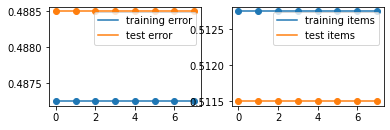

In [26]:
#Run SVM on training data and get accuracy on test data

#SIGMOID KERNEL

#Initialise a list to hold accuracy values for each level of k (the number of nearest neighbors considered)
acc = []

#Appears to be number of observations in training to use. 4000 happens to be all of them
m = 4000

from sklearn import svm

#initialise lists to hold errors
trainerr = []
testerr = []
traincorrect = []
testcorrect = []

#polynomial degrees to loop through
degrees = [0,1,2,3,4,5,6,7]

for degree in degrees:

  clf = svm.SVC(gamma='scale',kernel='sigmoid', degree=degree)
  clf.fit(traindat, trainlabs)  

  #training data accuracy
  pred = clf.predict(traindat)
  trainerr += [sum([pred[i] != trainlabs[i] for i in range(len(trainlabs))]) / len(trainlabs)]
  traincorrect += [sum([pred[i] == trainlabs[i] for i in range(len(trainlabs))]) / len(trainlabs)]

  #test data accuracy
  pred = clf.predict(testdat)
  testerr += [sum([pred[i] != testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]
  testcorrect += [sum([pred[i] == testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]

print(traincorrect)
print(testcorrect)

plot_SVC(degrees,trainerr,testerr,traincorrect,testcorrect)

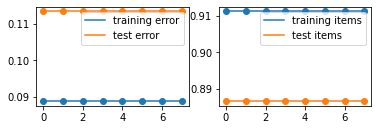

In [23]:
#Run SVM on training data and get accuracy on test data

#RADIAL BASIS FUNCTION KERNEL

#Initialise a list to hold accuracy values for each level of k (the number of nearest neighbors considered)
acc = []

#Appears to be number of observations in training to use. 4000 happens to be all of them
m = 4000

from sklearn import svm

#initialise lists to hold errors
trainerr = []
testerr = []
traincorrect = []
testcorrect = []

#polynomial degrees to loop through
degrees = [0,1,2,3,4,5,6,7]

for degree in degrees:

  clf = svm.SVC(gamma='scale',kernel='rbf', degree=degree)
  clf.fit(traindat, trainlabs)  

  #training data accuracy
  pred = clf.predict(traindat)
  trainerr += [sum([pred[i] != trainlabs[i] for i in range(len(trainlabs))]) / len(trainlabs)]
  traincorrect += [sum([pred[i] == trainlabs[i] for i in range(len(trainlabs))]) / len(trainlabs)]

  #test data accuracy
  pred = clf.predict(testdat)
  testerr += [sum([pred[i] != testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]
  testcorrect += [sum([pred[i] == testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]

plot_SVC(degrees,trainerr,testerr,traincorrect,testcorrect)

In [25]:
testcorrect


[0.8865, 0.8865, 0.8865, 0.8865, 0.8865, 0.8865, 0.8865, 0.8865]